In [1]:
import pandas as pd

# Load Dataset

In [2]:
train = pd.read_csv("../../../data/bike/train.csv", parse_dates=["datetime"])

print(train.shape)

train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("../../../data/bike/test.csv", parse_dates=["datetime"])

print(test.shape)

test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# Preprocessing

### Parse datetime

In [5]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)

train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second",
      "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [6]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)

test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second",
      "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


# Explore

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

### datetime

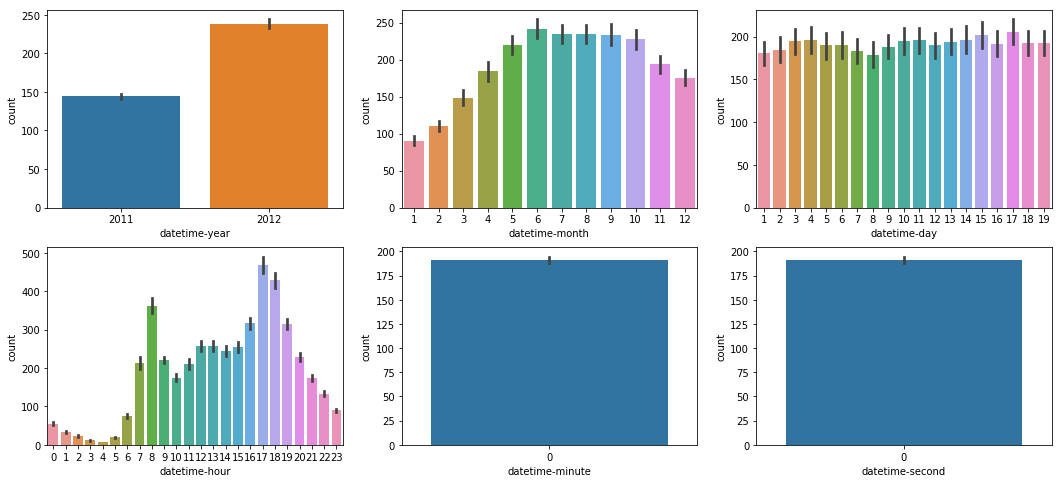

In [8]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

In [13]:
train["datetime-year(str)"] = train["datetime-year"].astype('str')
train["datetime-month(str)"] = train["datetime-month"].astype('str')

train["datetime-year-month"] = train["datetime-year(str)"] + "-" + train["datetime-month(str)"]

print(train.shape)

train[["datetime", "datetime-year-month"]].head()

(10886, 22)


,datetime,datetime-year-month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


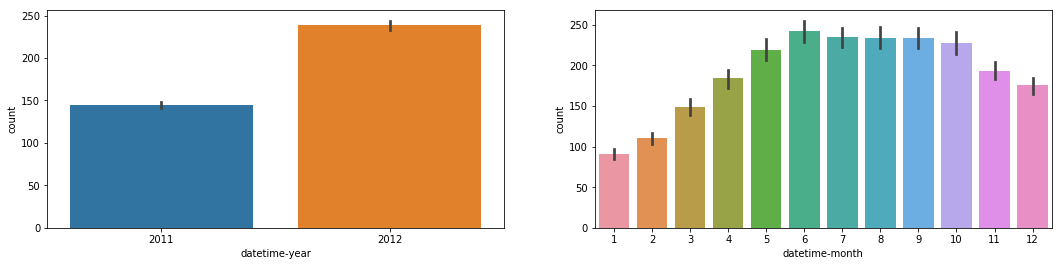

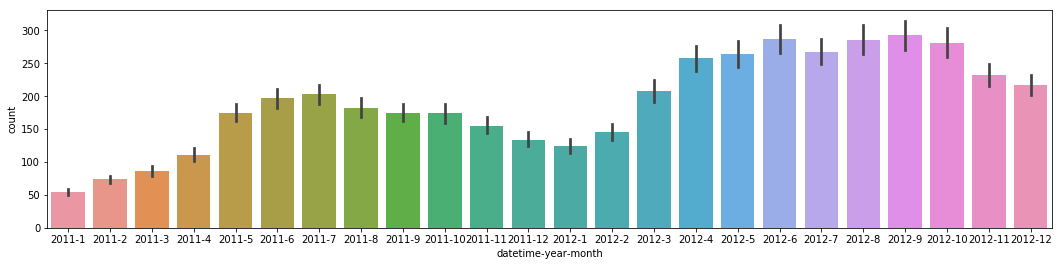

In [17]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year-month", y="count", ax=ax3)

### datetime-hour

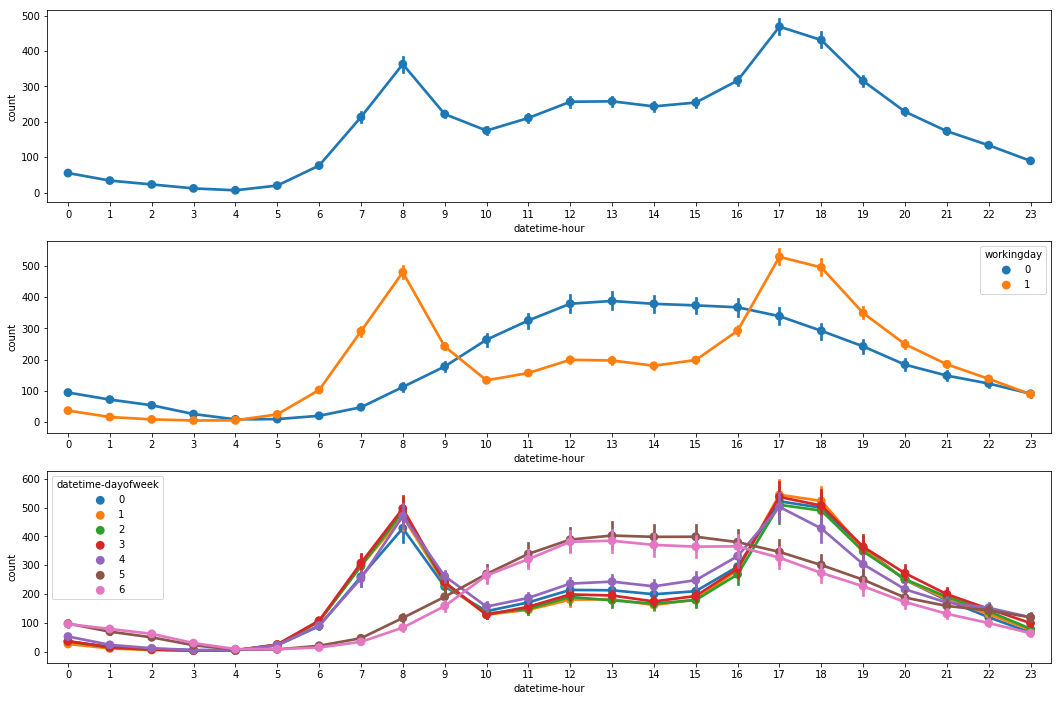

In [18]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

figure.set_size_inches(18, 12)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax3)

# Train

In [19]:
feature_names = ["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed",
                "datetime-year", "datetime-hour", "datetime-dayofweek"]

feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [22]:
label_name = "count"

label_name

'count'

In [23]:
X_train = train[feature_names]

print(X_train.shape)

X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [24]:
X_test = test[feature_names]

print(X_test.shape)

X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [25]:
y_train = train[label_name]

print(y_train.shape)

y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

# Use Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
model = RandomForestRegressor(n_jobs=-1,
                             random_state=37)

model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

# Evaluate

In [34]:
import numpy as np

from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    distance = log_predict - log_actual
    
    square_distance = distance ** 2
    
    mean_square_distance = square_distance.mean()
    
    score = np.sqrt(mean_square_distance)
    
    return score

rmsle_score = make_scorer(rmsle)
rmsle_score

make_scorer(rmsle)

# Score

In [36]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train,
                        cv=20, scoring=rmsle_score).mean()

print("Score = {0:.5f}".format(score))

Score = 0.37926


# Fit

In [37]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

# Predict

In [38]:
predictions = model.predict(X_test)

print(predictions.shape)

predictions

(6493,)


array([ 10. ,   4. ,   3.8, ..., 112.7,  91.4,  46.5])

# Submit

In [39]:
submission = pd.read_csv("../../../data/bike/sampleSubmission.csv")

print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [40]:
submission["count"] = predictions

print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,10.0
1,2011-01-20 01:00:00,4.0
2,2011-01-20 02:00:00,3.8
3,2011-01-20 03:00:00,3.4
4,2011-01-20 04:00:00,2.6


In [42]:
submission.to_csv("../../../data/bike/random-forest_0.43019.csv", index=False)